In [1]:
### 공공 데이터 셋
### 내부 데이터 셋
### 웹에서 수집한 데이터 셋

In [2]:
import seaborn as sns

In [3]:
tips = sns.load_dataset("tips")
tips.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
tips.tail(7)

,total_bill,tip,sex,smoker,day,time,size
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [ ]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [8]:
tips.shape

(244, 7)

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# 파생: 팁 비율
tips["tip_pct"] = tips["tip"] / tips["total_bill"]

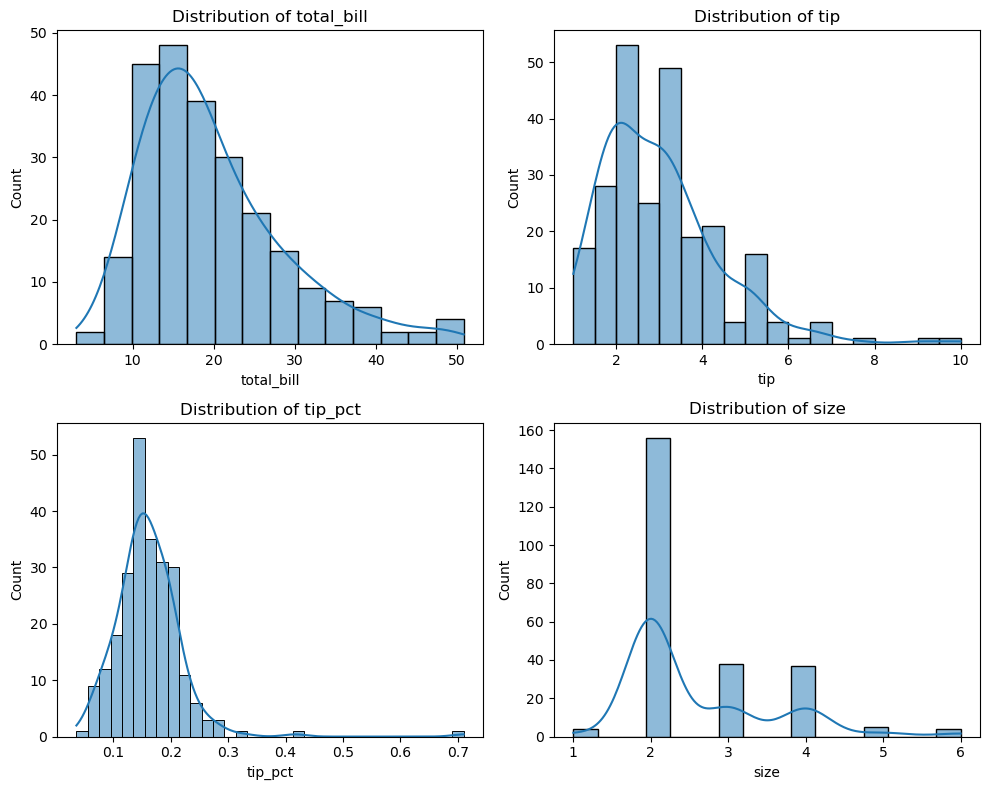

In [13]:
num_cols = ["total_bill", "tip", "tip_pct", "size"]
tips[num_cols].describe()

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
for ax, col in zip(axes.ravel(), num_cols):
    sns.histplot(data=tips, x=col, kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")
plt.tight_layout()

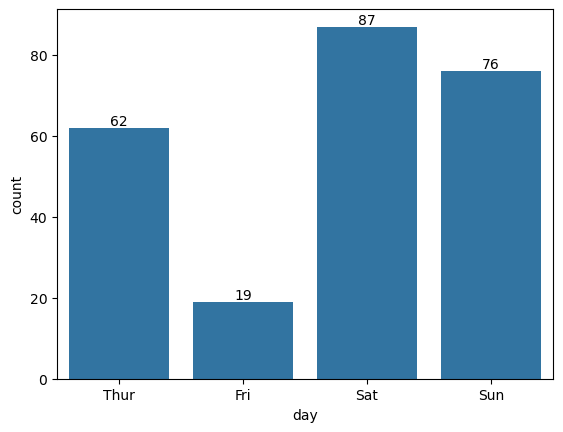

In [14]:
tips["tip_pct"] = tips["tip"] / tips["total_bill"]

# 요일 순서 지정(옵션)
tips["day"] = pd.Categorical(tips["day"], ["Thur","Fri","Sat","Sun"], ordered=True)

ax = sns.countplot(data=tips, x="day")
ax.bar_label(ax.containers[0])
plt.show()

c:\Users\front\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 46.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\front\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 39.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\front\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 26.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


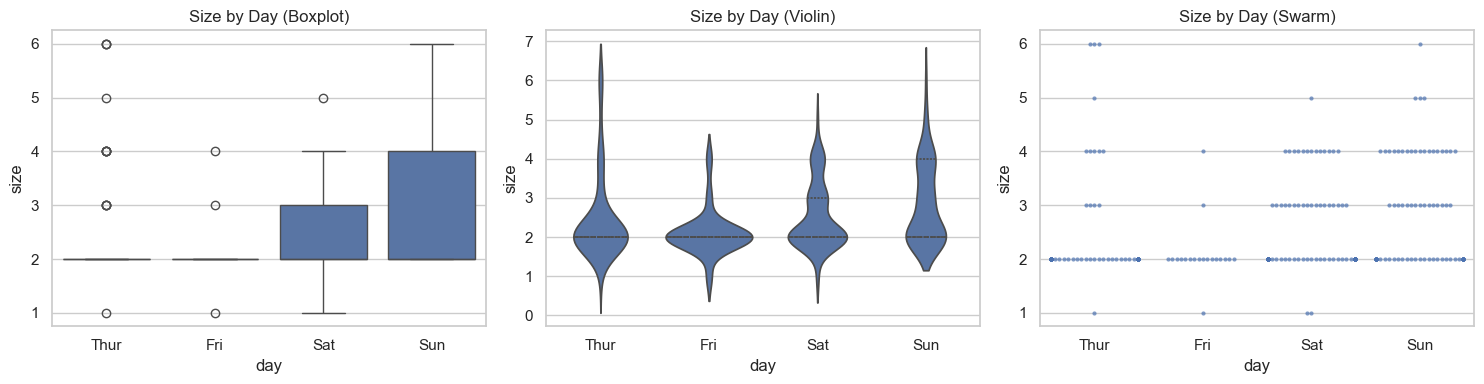

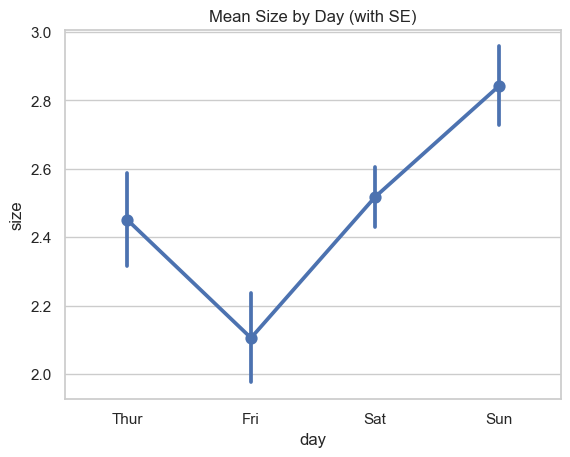

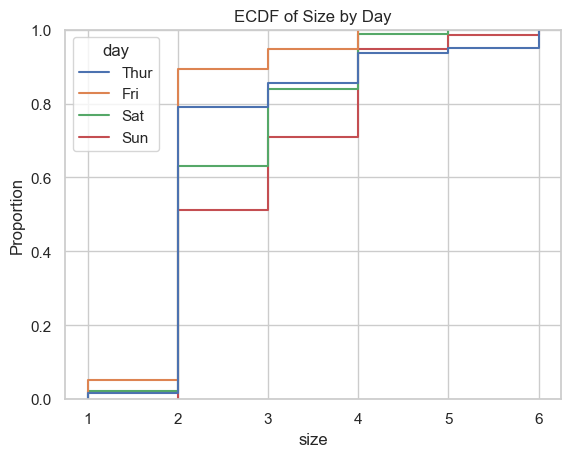

C:\Users\front\AppData\Local\Temp\ipykernel_2448\2465817053.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = tips.groupby("day")["group4p"].mean().rename("rate>=4")
C:\Users\front\AppData\Local\Temp\ipykernel_2448\2465817053.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("day")["group4p"]


day
Thur    0.145161
Fri     0.052632
Sat     0.160920
Sun     0.289474
Name: rate>=4, dtype: float64


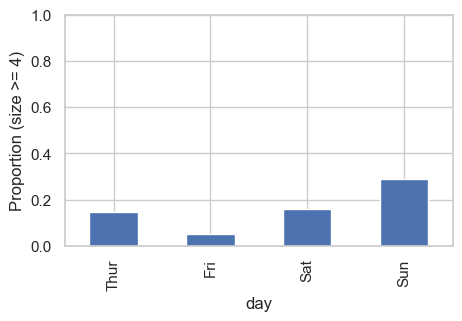

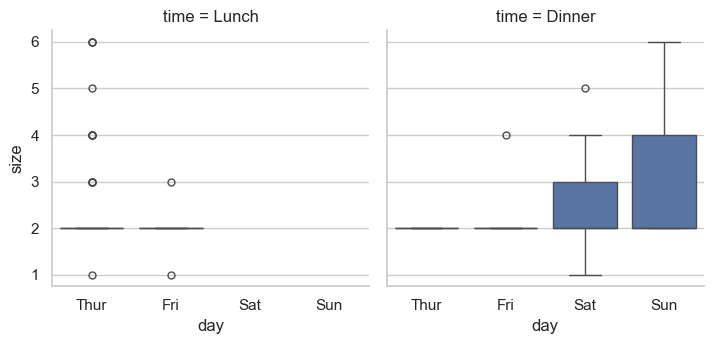

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips").copy()
tips["day"] = pd.Categorical(tips["day"], ["Thur","Fri","Sat","Sun"], ordered=True)

# 1) 요일별 size 분포
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.boxplot(data=tips, x="day", y="size", ax=axes[0])
axes[0].set_title("Size by Day (Boxplot)")

sns.violinplot(data=tips, x="day", y="size", inner="quartile", ax=axes[1])
axes[1].set_title("Size by Day (Violin)")

sns.swarmplot(data=tips, x="day", y="size", size=3, alpha=0.7, ax=axes[2])
axes[2].set_title("Size by Day (Swarm)")
plt.tight_layout(); plt.show()

# 2) 평균/신뢰구간 비교
sns.pointplot(data=tips, x="day", y="size", errorbar="se", dodge=True)
plt.title("Mean Size by Day (with SE)")
plt.show()

# 3) ECDF로 누적 분포 비교
sns.ecdfplot(data=tips, x="size", hue="day")
plt.title("ECDF of Size by Day")
plt.show()

# 4) '가족/모임' 가정: size>=4 비율 비교
tips["group4p"] = (tips["size"] >= 4)
rate = tips.groupby("day")["group4p"].mean().rename("rate>=4")
print(rate)

ax = (tips
      .groupby("day")["group4p"]
      .mean()
      .reset_index()
      .rename(columns={"group4p":"rate>=4"})
      .plot(kind="bar", x="day", y="rate>=4", legend=False, ylim=(0,1), figsize=(5,3)))
ax.set_ylabel("Proportion (size >= 4)")
plt.show()

# 5) 시간대별로 주말 효과 확인
sns.catplot(
    data=tips, x="day", y="size",
    col="time", kind="box", height=3.6
)
plt.show()

In [16]:
tips_have = tips.iloc[ 0:220, :]  # 현재 가진 고객 데이터
tips_new  = tips.iloc [220: , :]  # 미래의 고객 데이터

tips_new.drop(["size"], axis=1, inplace=True)

tips_have.shape, tips_new.shape

C:\Users\front\AppData\Local\Temp\ipykernel_2448\915999256.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tips_new.drop(["size"], axis=1, inplace=True)


((220, 8), (24, 7))

In [18]:
sel = ['total_bill', 'tip']

In [19]:
X = tips_have[sel]
y = tips_have['size']  # 우리가 예측할 컬럼(변수)

test_X = tips_new[sel]       # 예측할 친구는 다른 데이터 셋

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
model = RandomForestClassifier() # 모델 만들기
model.fit(X, y)     # 모델 훈련시키기  model.fit(입력, 출력)
pred = model.predict(test_X)    # 학습된 모델로 예측하기
pred

array([2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4,
       2, 4])